# HR Analytics
Working with a [HR Analytics data set from Kaggle](https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/discussion/456134).

## Data Exploration

### 1. Import Statements

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load and View Data

In [14]:
df = pd.read_csv('data/HR_Analytics.csv')
pd.set_option('display.max_columns', None) # show all columns rather than truncating
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [15]:
pd.set_option('display.max_columns', None) # show all columns rather than truncating
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


These views of the data reveal the following points that I'd like to look into further

**a.** The field `YearsWithCurrManager` appears to have null values

**b.** I want to check the granularity of the data, and ensure that the two ID fields are unique.

**c.** The following fields all appear to be on a 1-5 scale, where we can't assume to know which end of the scale is positive, and which is negative.

- Education
- Environmental Satisfaction
- Job Involvement
- Job Level
- Job Satisfaction
- Performance Rating
- Relationship Satisfaction
- Worklife Balance

We can probably infer the direction of some of these scales by comparing values against other fields where we we intuitively understand there to be a relationship

*e.g. We would anticipate a more negative Worklife Balance outcome for an employee that works overtime and travels a lot*

### 3. Understanding/Cleansing the data

**a.** Investigating `YearsWithCurrManager` values



In [16]:
df['YearsWithCurrManager'].isnull().sum()

57

57 missing values implies that this field is not going to be reliable to use in any model, so I'm going to drop this field now to avoid skewing my model at a later stage.  I'll need to use more reliable features in my predictions.

I'm also dropping `StandardHours` and `EmployeeCount` as there is no variance at all in those fields

In [17]:
df = df.drop(['YearsWithCurrManager','StandardHours','EmployeeCount'], axis=1)
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,0,0,2,3,0,0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,0,0,2,3,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,0,0,3,3,0,0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,0,0,2,3,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,0,0,0,3,0,0,0


**b.** Investigating `EmpID` and `EmployeeNumber`

In [18]:
# counting the occurrence of values in EmpID and EmployeeNumber
EmpIDs = df['EmpID'].value_counts()
EmployeeNumbers = df['EmployeeNumber'].value_counts()

print('The data set contains %s unique employee IDs and %s unique employee numbers' % (len(EmpIDs), len(EmployeeNumbers)))

The data set contains 1470 unique employee IDs and 1470 unique employee numbers


There are 1480 rows in the complete data set, so I just want to check the data for the 10 rows that differ to see if they are a duplication or if they represent a change in state in the data

In [19]:
# checking to see if any of the 10 rows could be duplicates
df.duplicated().value_counts()

False    1470
True       10
Name: count, dtype: int64

Now that we know these are duplicates we can confidently drop them

In [20]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

**c.** Getting a firm grip on the direction of the numerical scales for the previously listed fields...

<Axes: >

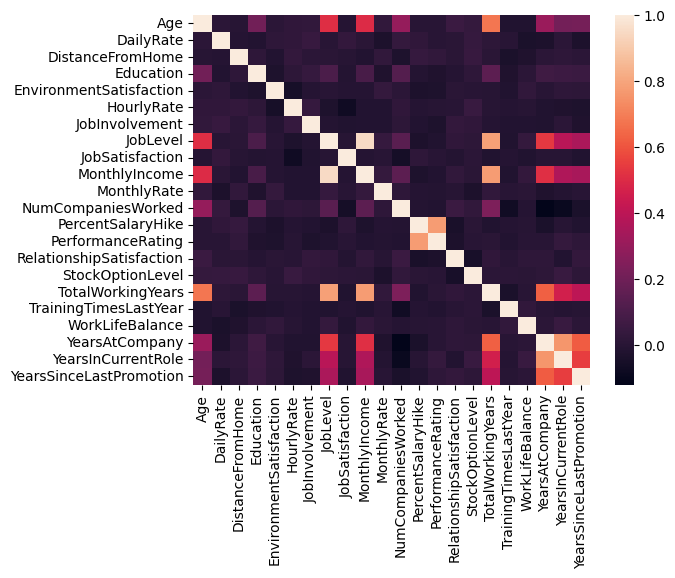

In [22]:
# df of numerical values for heatmap analysis
heatmap_df = df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']]

sns.heatmap(heatmap_df.corr())

From the heatmap we can see that for `JobLevel` the strongest correlation is `MonthlyIncome`.  If we plot these two variables against each other we can see this relationship and confidently infer that 1 is the lowest job level, and 5 is the highest job level

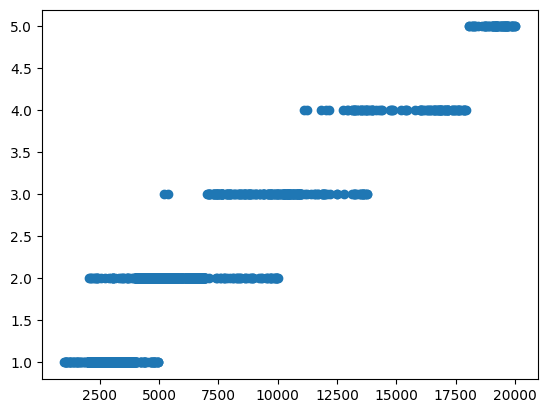

In [27]:
plt.scatter(df['MonthlyIncome'], df['JobLevel'])

Similarly, plotting `PercentSalaryHike` against `PerformanceRating` shows a clear threshold for salary increases based on performance rating, even though the data set actually only contains two performance ratings - 3 and 4.

Given that there are only two values available for performance rating, and that these are both ratings that aquired salary increases, this data set is really well set up to answer questions around retaining high performers, though we probably won't need to use the field `PerformanceRating` going forward.

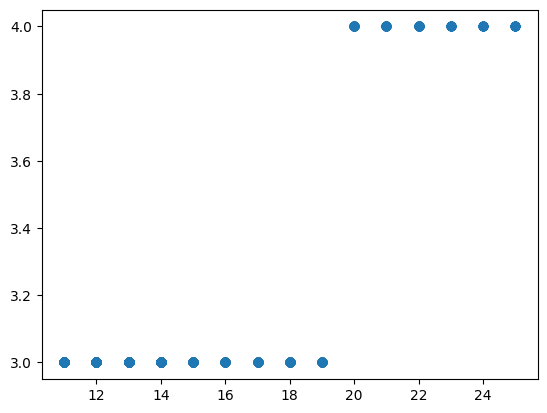

In [28]:
plt.scatter(df['PercentSalaryHike'], df['PerformanceRating'])

Unfortunately we can't see strong enough correlations between pairs of features to infer direct relationships between individual features and satisfaction scores, but perhaps we could use machine learning to detect patterns between employees that could help us to categorise the likelihood of a worker leaving the firm.

Some non-numerical fields that would seem to me to have a clear impact on my job satisfaction are:

- BusinessTravel
- Department
- Gender
- JobRole
- OverTime

So I'm going to pivot these, along with `Attrition`, to be numerical features so that we can include them in our model.


In [29]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64